In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
%matplotlib inline

In [2]:
d=p.read_csv('input source')
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
d.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
d['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

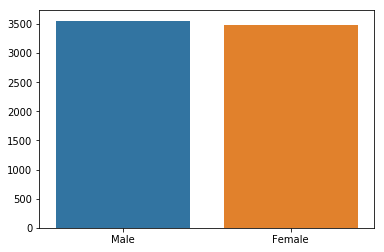

In [6]:
sns.barplot(['Male','Female'],[3555,3488])
#plt.savefig(r'C:\Users\Mansha\Desktop\optimizers\1.png',dpi=1200)

In [7]:
d['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [8]:
d['SeniorCitizen'].replace({0:'No',1:'yes'},inplace=True)
d['SeniorCitizen'].value_counts()

No     5901
yes    1142
Name: SeniorCitizen, dtype: int64

In [9]:
d['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [10]:
d['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [11]:
d['tenure'].value_counts()     #numeric data

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [12]:
d['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
d['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
d['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
d['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [17]:
d['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [18]:
d['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [19]:
d['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [20]:
d['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [21]:
d['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [22]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    d[i]  = d[i].replace({'No internet service' : 'No'})

In [23]:
d['StreamingMovies'].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [359]:
d['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [24]:
d['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [25]:
d['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [26]:
d['MonthlyCharges'].value_counts()      #Another numerical data

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
19.70     43
19.65     43
19.55     40
20.15     40
19.75     39
20.25     39
20.35     38
19.80     38
19.60     37
20.10     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
          ..
67.50      1
33.50      1
48.15      1
31.10      1
39.95      1
81.65      1
117.45     1
107.00     1
66.35      1
62.30      1
112.60     1
110.70     1
28.60      1
108.60     1
73.10      1
39.55      1
53.70      1
21.30      1
18.40      1
67.60      1
33.75      1
29.40      1
57.80      1
34.55      1
107.65     1
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [27]:
d['TotalCharges'].value_counts()        #Another Numerical data
d['TotalCharges']=p.to_numeric(d['TotalCharges'],errors='coerce')
d['TotalCharges'].isnull().sum()

11

In [28]:
m=d['TotalCharges'].astype('float').mean(axis=0)
d['TotalCharges'].replace(n.nan,m,inplace=True)

In [29]:
d['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [433]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Visualization

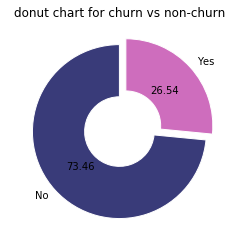

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

size = 0.6
lab = d["Churn"].value_counts().keys().tolist()
vals = d["Churn"].value_counts().values.tolist()

cmap = plt.get_cmap("tab20b")
outer_colors = cmap(np.arange(3)*0.9)

ax.pie(vals,labels=lab,explode=(0,0.1), radius=1, autopct="%0.2f", colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),startangle=90)

ax.set(aspect="equal", title='donut chart for churn vs non-churn')
plt.show()

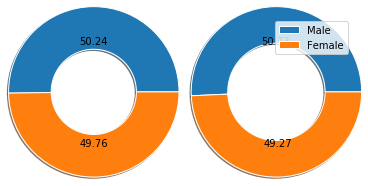

           gender distributiom


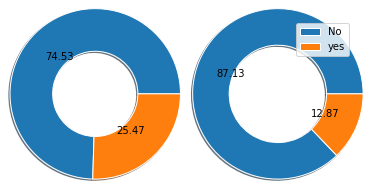

           SeniorCitizen distributiom


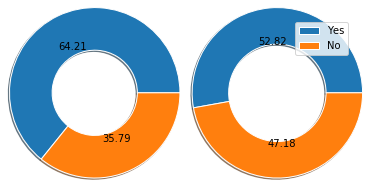

           Partner distributiom


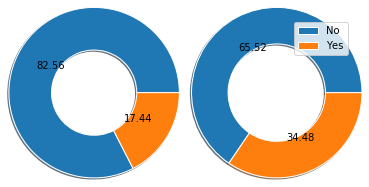

           Dependents distributiom


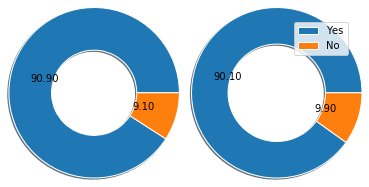

           PhoneService distributiom


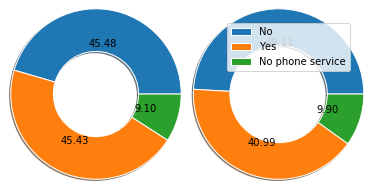

           MultipleLines distributiom


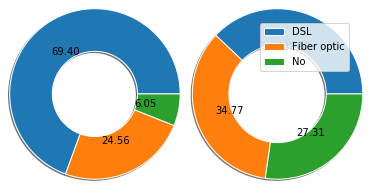

           InternetService distributiom


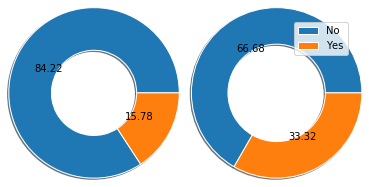

           OnlineSecurity distributiom


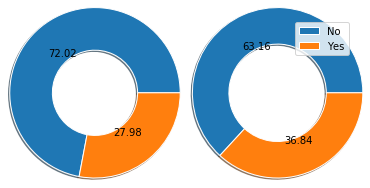

           OnlineBackup distributiom


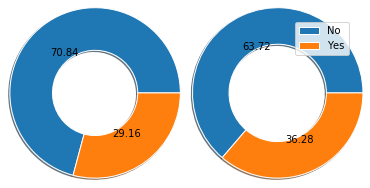

           DeviceProtection distributiom


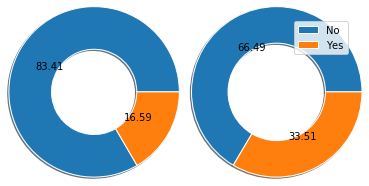

           TechSupport distributiom


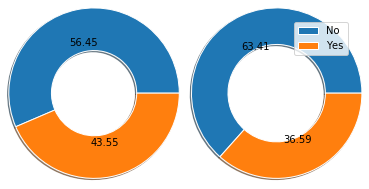

           StreamingTV distributiom


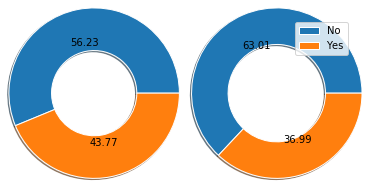

           StreamingMovies distributiom


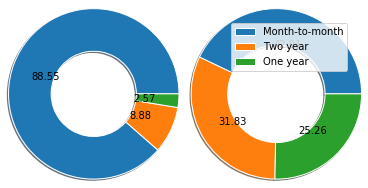

           Contract distributiom


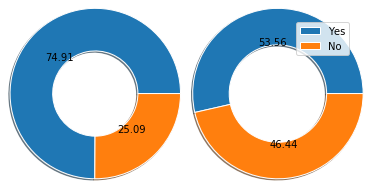

           PaperlessBilling distributiom


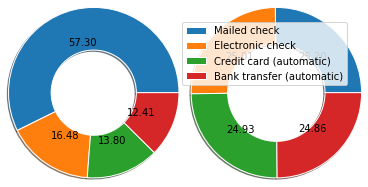

           PaymentMethod distributiom


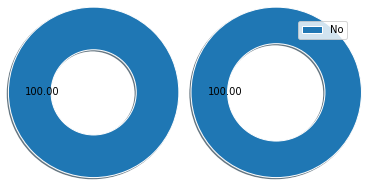

           Churn distributiom


In [31]:
churn = d[d["Churn"] == "Yes"]
not_churn = d[d["Churn"] == "No"]

cat_cols   = d.nunique()[d.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in d['Churn']]
num_cols   = [x for x in d.columns if x not in cat_cols + ['customerID'] + ["Churn"]]

def plot_pie(col) :
    fig, (ax1, ax2) = plt.subplots(1,2)
    size = 0.7
    lab = churn[col].value_counts().keys().tolist()
    vals = churn[col].value_counts().values.tolist()
    
    ax1.pie(vals, shadow=True, autopct='%.2f',radius=1.4,
           wedgeprops=dict(width=size, edgecolor='w')) 
    ax1.set(aspect="equal")
    
    size = 0.6
    lab = not_churn[col].value_counts().keys().tolist()
    vals = not_churn[col].value_counts().values.tolist()
    
    ax2.pie(vals, shadow=True,radius=1.4, autopct='%.2f',
           wedgeprops=dict(width=size, edgecolor='w')) 
    ax2.set(aspect="equal")
    
    #plt.title(i+" distribution")
    plt.legend(lab)
    plt.show()
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)
    print('           '+i+' distributiom')

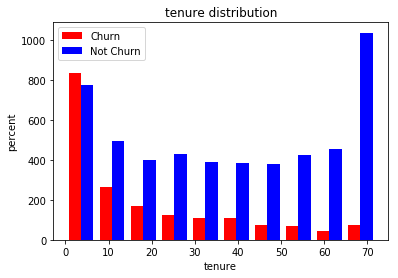

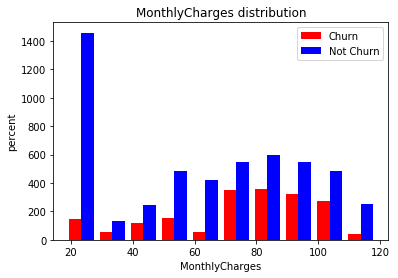

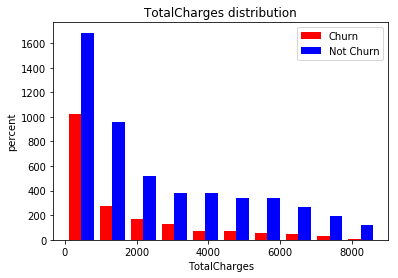

In [32]:
 def histogram(col) :
    cmap = plt.get_cmap("tab20c")
    colors = cmap(np.arange(2)*0.8)
    plt.hist([churn[col],not_churn[col]],color=["red","blue"],label=["Churn","Not Churn"])
    plt.xlabel(col)
    plt.ylabel("percent")
    plt.title(col+" distribution")
    plt.legend()
    plt.show()
for i in num_cols :
    histogram(i)

In [33]:
d.shape

(7043, 21)

### Data Preprocessing

In [34]:
d.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
d.drop('customerID',axis=1,inplace=True)#customer ID is irrelevant to predict churn

### Model Application

In [36]:
x=d.drop('Churn',axis=1)
x.shape

(7043, 19)

In [37]:
y=d['Churn']
y.shape

(7043,)

In [38]:
x=p.get_dummies(x,drop_first=True)

In [39]:
x.shape

(7043, 24)

In [40]:
x.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
d['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100,stratify=y)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
x_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=sc.fit_transform(x_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
x_test[['tenure', 'MonthlyCharges', 'TotalCharges']]=sc.transform(x_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shubh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [46]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1455,0.150197,1.378513,0.691290,0,0,1,0,1,0,1,...,1,1,0,1,0,1,1,1,0,0
1063,-0.909449,-0.077392,-0.737523,1,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
5590,-0.298115,-1.510030,-0.797555,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
624,-1.031715,-1.481776,-0.948356,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3005,-0.338870,-1.471804,-0.805383,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [47]:
x_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5603,-1.276249,-0.531116,-0.987830,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
529,0.965309,1.174088,1.521535,0,1,0,0,1,0,1,...,1,1,1,0,0,1,1,0,0,0
6166,-0.053581,1.317019,0.429185,0,0,1,1,1,0,1,...,1,1,1,1,0,0,1,0,1,0
1814,-0.827938,-1.491748,-0.894799,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2496,-0.583404,-1.480114,-0.837029,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lm1=LogisticRegression() 

In [49]:
lm1.fit(x_train,y_train)

C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
lm1.score(x_train,y_train)  

0.8077742279020235

In [51]:
lm1.score(x_test,y_test)  

0.7984386089425124

In [53]:
y_pred1=lm1.predict(x_test)

In [54]:
 prob1=lm1.predict_proba(x_test)

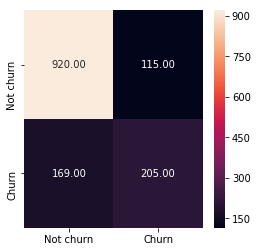

In [55]:
cm1=confusion_matrix(y_test,y_pred1)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm1,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')

In [56]:
cr1=classification_report(y_test,y_pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [57]:
 ac1=accuracy_score(y_test,y_pred1)
print(ac1)

0.7984386089425124


In [58]:
xtrain=x_train.values
xtest=x_test.values
ytest=y_test.values
ytrain=y_train.values

0.7185086155674391


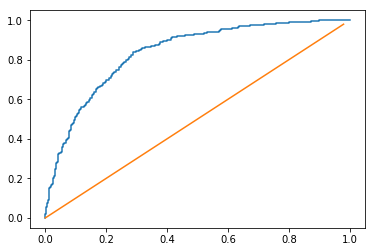

In [59]:
roc1=roc_auc_score(ytest,y_pred1)
print(roc1)
fpr,tpr,thresolds = roc_curve(y_true=ytest,y_score=prob1[:,1])
plt.plot(fpr,tpr)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

## Decision Tree

In [60]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [61]:
ml2=DecisionTreeClassifier()

In [62]:
ml2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
ml2.score(x_train,y_train)

0.997515086971956

In [64]:
ml2.score(x_test,y_test)

0.7210787792760823

In [65]:
y_pred2=ml2.predict(x_test)

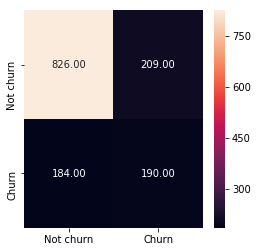

In [66]:
cm2=confusion_matrix(y_test,y_pred2)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm2,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')

In [67]:
cr2=classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.51      0.49       374

   micro avg       0.72      0.72      0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



In [68]:
ac2=accuracy_score(y_test,y_pred2)
ac2

0.7210787792760823

ROC Score :0.6530445116122866


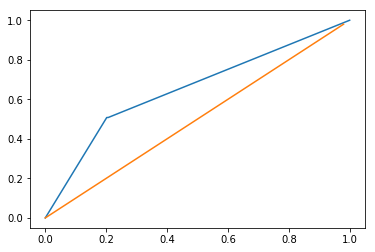

In [69]:
prob2=ml2.predict_proba(x_test)
roc2=roc_auc_score(y_test,y_pred2)
print("ROC Score :"+str(roc2))
fpr2,tpr2,thresolds2 = roc_curve(y_true=y_test,y_score=prob2[:,1])
plt.plot(fpr2,tpr2)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier


In [71]:
ml3=RandomForestClassifier()

In [72]:
ml3.fit(x_train,y_train)

C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_pred3=ml3.predict(x_test)

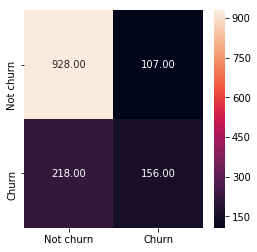

In [74]:
cm3=confusion_matrix(y_test,y_pred3)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm3,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')

In [75]:
cr3=classification_report(y_test,y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1035
           1       0.59      0.42      0.49       374

   micro avg       0.77      0.77      0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409



In [76]:
ac3=accuracy_score(y_test,y_pred3)
ac3

0.7693399574166075

ROC Score :0.6568653284765816


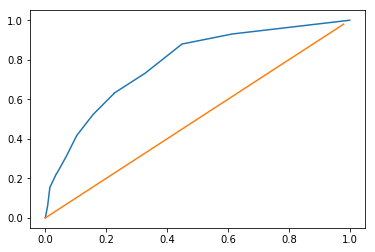

In [77]:
prob3=ml3.predict_proba(x_test)
roc3=roc_auc_score(y_test,y_pred3)
print("ROC Score :"+str(roc3))
fpr3,tpr3,thresolds3 = roc_curve(y_true=y_test,y_score=prob3[:,1])
plt.plot(fpr3,tpr3)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

## KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
ml5=KNeighborsClassifier()

In [89]:
ml5.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
ml5.score(x_train,y_train)

0.8375931842385517

In [91]:
ml5.score(x_test,y_test)

0.7494677075940384

In [92]:
y_pred5=ml5.predict(x_test)

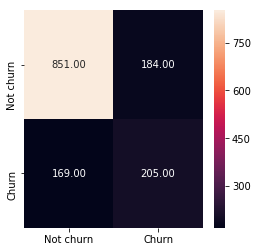

In [93]:
cm5=confusion_matrix(y_test,y_pred5)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm5,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')

In [94]:
cr5=classification_report(y_test,y_pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1035
           1       0.53      0.55      0.54       374

   micro avg       0.75      0.75      0.75      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.75      0.75      0.75      1409



In [95]:
ac5=accuracy_score(y_test,y_pred5)
print(ac5)

0.7494677075940384


ROC Score :0.6851752822341056


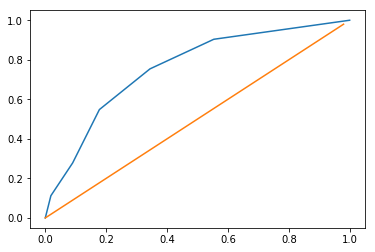

In [96]:
prob5=ml5.predict_proba(x_test)
roc5=roc_auc_score(y_test,y_pred5)
print("ROC Score :"+str(roc5))
fpr5,tpr5,thresolds5 = roc_curve(y_true=y_test,y_score=prob5[:,1])
plt.plot(fpr5,tpr5)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

## SVM

In [97]:
from sklearn.svm import SVC
ml6=SVC(kernel='rbf',probability=True,gamma=1.0)

In [98]:
ml6.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
y_pred6=ml6.predict(x_test)

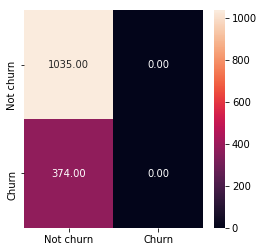

In [100]:
cm6=confusion_matrix(y_test,y_pred6)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm6,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')   

In [101]:
cr6=classification_report(y_test,y_pred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

   micro avg       0.73      0.73      0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shubh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [102]:
ac6=accuracy_score(y_test,y_pred6)
ac6

0.7345635202271115

ROC Score :0.7778061949417447


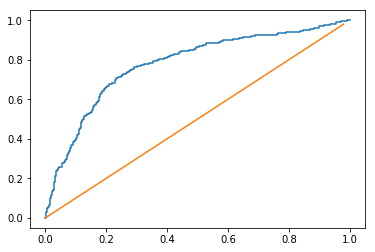

In [103]:
prob6=ml6.predict_proba(x_test)
prob6
roc6=roc_auc_score(y_test,prob6[:,1])
print("ROC Score :"+str(roc6))
fpr6,tpr6,thresolds6 = roc_curve(y_test,prob6[:,1])
plt.plot( fpr6,tpr6)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

## Artificial neural networks

In [104]:
import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [627]:
classifier = Sequential()

In [653]:
classifier.add(Dense(output_dim = 6, activation = 'relu', input_dim = 30))

# Adding the first hidden layer
classifier.add(Dense(output_dim = 6, activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1,  activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
mod=classifier.fit(x_train, y_train,validation_data=(x_test,y_test), batch_size = 10, nb_epoch = 100)

C:\Users\Mansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=6)`
  """Entry point for launching an IPython kernel.
C:\Users\Mansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6)`
  after removing the cwd from sys.path.
C:\Users\Mansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6)`
  import sys
C:\Users\Mansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mansha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 5634 samples, validate on 1409 samples
Epoch 1/100
5634/5634 [==============================] - 4s 762us/step - loss: 0.5659 - acc: 0.7430 - val_loss: 0.4742 - val_acc: 0.7793
Epoch 2/100
5634/5634 [==============================] - 2s 271us/step - loss: 0.4375 - acc: 0.8099 - val_loss: 0.4678 - val_acc: 0.7715
Epoch 3/100
5634/5634 [==============================] - 2s 275us/step - loss: 0.4179 - acc: 0.8110 - val_loss: 0.4536 - val_acc: 0.7757
Epoch 4/100
5634/5634 [==============================] - 2s 279us/step - loss: 0.4103 - acc: 0.8140 - val_loss: 0.4686 - val_acc: 0.7693
Epoch 5/100
5634/5634 [==============================] - 2s 281us/step - loss: 0.4069 - acc: 0.8097 - val_loss: 0.4655 - val_acc: 0.7686
Epoch 6/100
5634/5634 [==============================] - 2s 273us/step - loss: 0.4061 - acc: 0.8136 - val_loss: 0.4707 - val_acc: 0.7700
Epoch 7/100
5634/5634 [==============================] - 2s 279us/step - loss: 0.4015 - acc: 0.8154 - val_loss: 0.4635 - val_acc: 

In [661]:
y_pred12 = classifier.predict(x_test)
y_pred7 = (y_pred12 > 0.5)

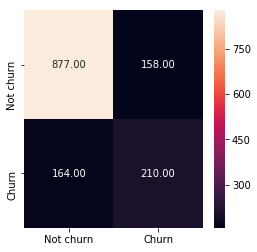

In [662]:
cm6=confusion_matrix(y_test,y_pred7)
#To plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap( data=cm6,xticklabels=["Not churn","Churn"],yticklabels = ["Not churn","Churn"],annot=True,fmt='.2f')   

In [663]:
ac7=accuracy_score(y_test,y_pred7)
print(ac7)

0.7714691270404542


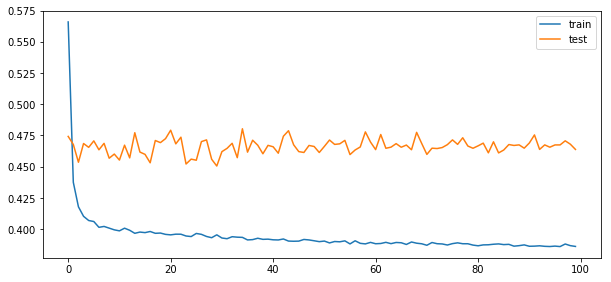

In [664]:
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.plot(mod.history['loss'],label='train')
plt.plot(mod.history['val_loss'],label='test')
plt.legend()
plt.show()

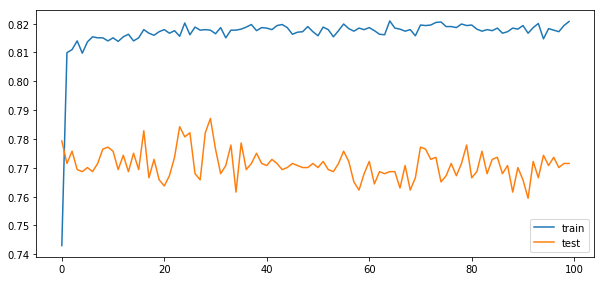

In [665]:
plt.figure(figsize=(10,10))
plt.subplot(212)
plt.plot(mod.history['acc'],label='train')
plt.plot(mod.history['val_acc'],label='test')
plt.legend()
plt.show()

ROC Score :0.7631610219845515


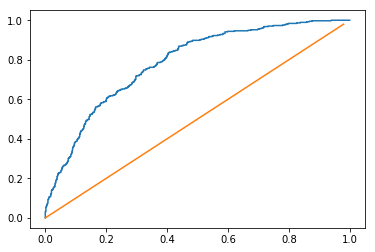

In [666]:
roc7=roc_auc_score(y_test,y_pred7)
print("ROC Score :"+str(roc6))
fpr7,tpr7,thresolds7 = roc_curve(y_test,prob7)
plt.plot( fpr7,tpr7)
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02))
plt.show()

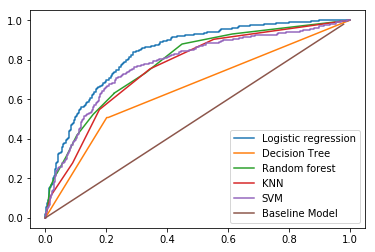

In [105]:
plt.plot(fpr,tpr,label='Logistic regression')
plt.plot(fpr2,tpr2,label='Decision Tree')
plt.plot(fpr3,tpr3,label='Random forest')
plt.plot(fpr5,tpr5,label='KNN')
plt.plot(fpr6,tpr6,label='SVM')
plt.plot(fpr7,tpr7,label='ANN')
plt.plot(n.arange(0,1,0.02),n.arange(0,1,0.02),label='Baseline Model')
plt.legend()
plt.show()

In [106]:
accuracies=[ac1,ac2,ac3,ac5,ac6,ac7]
models=['Logistic Regression','Decision Tree','Random forest','Naive Bayes','KNN','SVM','ANN']
plt.plot(models,accuracies)
plt.xticks(models,rotation='vertical')
plt.show()

NameError: name 'ac7' is not defined